결함이 있는 제품을 감지하는 시스템을 만들 때
1. 자동으로 사진을 찍는 시스템
2. 찍은 사진으로 빅데이터셋 구축
3. 모든 사진에 결함여부 레이블 부여 (수동으로 처리)

레이블을 부여하는 작업은 시간이 오래 걸리고 비용이 많이 들며 지루한 단점이 있다. 그래서 보통 전체 중 레이블 처리된 데이터셋은 적은데,
그러면 분류기 성능이 좋게 나오기 힘들다. 그래서 레이블 처리가 필요없는 비지도 학습이 필요하다.

비지도 학습과 알고리즘들 : 군집 clustering , 이상치 탐지 outlier detection , 밀도 추정 density estimation

# 1. 군집
레이블된 경우 Logistic linear, SVM,Random Forest 분류기 분류 알고리즘이 알맞으나,
레이블이 없는 경우 분류 알고리즘을 사용할 수 없다. 그래서 군집 알고리즘이 필요하다.

군집 활용의 예
- 고객 분류(를 이용한 추천 시스템)
- 데이터 분석
- 차원 축소 기법(고차원 데이터셋을 clustering-친화성으로 측정-을 한 데이터셋으로 차원 축소하여 이용할 수 있다)
- 이상치 탐지(clustering하기 힘든-친화성이 낮은-샘플은 이상치일 가능성이 높다고 본다)
- 준지도 학습
- 검색 엔진(제시된 이미지와 비슷한 이미지를 찾아주기 위해서 - 훈련된 군집 모델에서 검색 이미지의 클러스터를 찾아 반환해준다)
- 이미지 분할(색 기준으로 픽셀을 clustering, 각 픽셀 색을 각 클러스터 평균 색으로 변경 -> 이미지 색상 종류 줄이기)

## 1.1 k-means
- Hard clustering : 클러스터마다 샘플에 점수를 부여
- Soft clustering : 샘플과 센트로이드 사이 거리

<과정>
1. 랜덤으로 k개의 클러스터링 중심을 선정한다
2. 각 데이터셋과 각 클러스터링 중심 거리를 계산해서 각자 가장 가까운 클러스터링에 속하게 한다
3. 랜덤으로 정했던 클러스터링 중심을 군집된 데이터셋의 정중앙으로 업데이트한다
4. 2와 3을 반복하며 중심이 더 이상 변하지 않을때까지 계속한다.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Saving figure blobs_plot


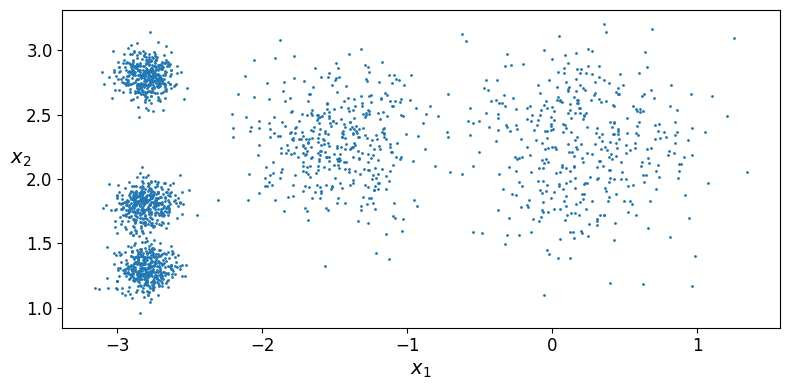

In [3]:
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
save_fig("blobs_plot")
plt.show()

In [4]:
from sklearn.cluster import KMeans

k=5
kmeans=KMeans(n_clusters=k)
y_pred=kmeans.fit_predict(X)

In [5]:
y_pred
y_pred is kmeans.labels_

True

transform() method를 이용한 샘플과 각 센트로이드(각 클러스터링의 중심) 사이 거리 추출


In [6]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

In [7]:
kmeans.predict(X_new)

array([1, 1, 2, 2], dtype=int32)

### 클러스터링 중심 좋은 초기값 찾기

**방법1.**
KMeans 매개변수 init, n_init 설정 \
init=다른 군집 알고리즘을 실행한 결과(numpy array) \
n_init=1(알고리즘 1번 실행)

In [8]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

**방법2.**
여러 번 다른 랜덤 초기값으로 알고리즘 실행 \
n_init=10(알고리즘 10번 실행) \
, 성능지표를 보고 최적의 솔루션 선택 \
성능지표 = (각 샘플과 가장 가까운 중심 사이 평균 제곱거리) 모델의 이너셔 inertia \
이너셔가 가장 낮은 모델 선택 \
.inertia_ 로 이너셔 확인

In [9]:
kmeans.score(X)

-211.59853725816834

score() 는 이너셔의 음수값 반환 \
왜? 이너셔의 값이 커진다 = 샘플과 중심 사이 거리가 멀어진다 = 좋지 않다. \
여기서 score()는 scikitlearn의 규칙을 따른다. scikit-learn은 '큰 값이 좋은 것이다' 규칙이 있다. \
큰 값이 좋으려면 이너셔의 값이 작아져야 좋은것을 활용하기 위해 score()에서 음수로 만들어 값이 클수록 좋게 만들어준다.

### K-means++ 알고리즘
1. 모든 데이터셋이 중심점이다
2. 각 중심점끼리 거리를 구한다
3. 가장 거리가 짧은 중심점끼리 군집화를 이룬다
4. 군집화된것의 중심점끼리 거리를 구한다, 2번과 3번이 반복된다
5. 군집화하여 최종적으로 하나로 이룰때까지 반복한다

여기서 가장 적합한 군집화를 이루는 계층을 고르면 된다.

### k-means 속도 개선과 mini batch k-means 
불필요한 거리 계산을 하지않으면 알고리즘 속도를 상당히 높일 수 있다.

In [10]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters=5, random_state=42)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5, random_state=42)

만약 데이터셋이 메모리에 들어가지 않으면 
- memmap 을 사용할 수 있다.
- MiniBatchKMeans.partial_fit() 로 한 번에 하나의 미니배치를 전달할 수 있다.

"mini batch k-means" is much faster than "k-means" \
But, innertial은 mini batch가 조금 더 나쁘다. especially 클러스터 개수가 증가할 수록.

In [38]:
%timeit KMeans(n_clusters=5, random_state=42).fit(X)
%timeit MiniBatchKMeans(n_clusters=5, random_state=42).fit(X)

4.1 s ± 572 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
47 ms ± 3.32 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


100/100Saving figure minibatch_kmeans_vs_kmeans


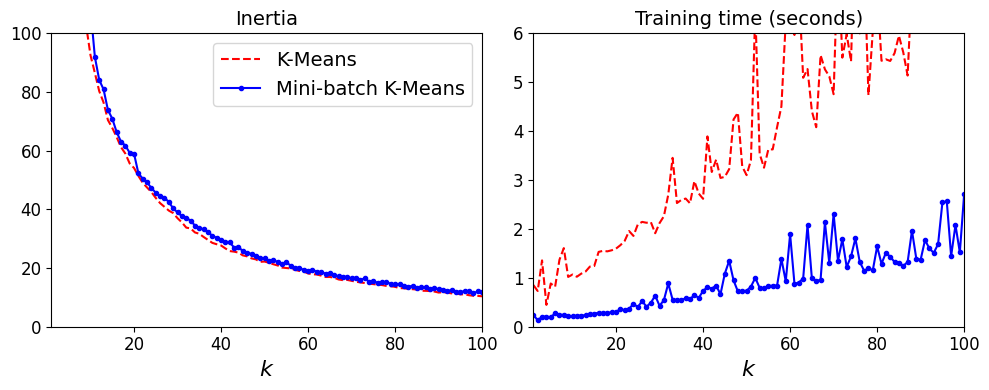

In [12]:
from timeit import timeit
times = np.empty((100, 2))
inertias = np.empty((100, 2))
for k in range(1, 101):
    kmeans_ = KMeans(n_clusters=k, random_state=42)
    minibatch_kmeans = MiniBatchKMeans(n_clusters=k, random_state=42)
    print("\r{}/{}".format(k, 100), end="")
    times[k-1, 0] = timeit("kmeans_.fit(X)", number=10, globals=globals())
    times[k-1, 1]  = timeit("minibatch_kmeans.fit(X)", number=10, globals=globals())
    inertias[k-1, 0] = kmeans_.inertia_
    inertias[k-1, 1] = minibatch_kmeans.inertia_
plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(range(1, 101), inertias[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), inertias[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Inertia", fontsize=14)
plt.legend(fontsize=14)
plt.axis([1, 100, 0, 100])

plt.subplot(122)
plt.plot(range(1, 101), times[:, 0], "r--", label="K-Means")
plt.plot(range(1, 101), times[:, 1], "b.-", label="Mini-batch K-Means")
plt.xlabel("$k$", fontsize=16)
plt.title("Training time (seconds)", fontsize=14)
plt.axis([1, 100, 0, 6])

save_fig("minibatch_kmeans_vs_kmeans")
plt.show()

inertial의 값이 크게 차이는 보이지 않으나 시간차이가 많이 나는것을 볼 수 있다.

### 최적의 K값. 클러스터 개수 찾기

가장 작은 이너셔를 가진 모델 선택? \
훈련이 진행될 수록 이너셔값은 작아지겠지만 그렇다고 최적의 k값은 아니다. 이너셔값이 감소하는 정도가 미세하다면 크게 도움이 되지않기 때문이다.

**<평가방법>**
- 실루엣 점수 silhouette score = 모든 샘플에 대한 실루엣 계수 silhouette coefficient 평균 
- 실루엣 계수 = (b-a)/max(a,b) (단, a=동일 클러스터에 있는 다른 샘플까지 평균 거리, b=가장 가까운 클러스터까지 평균 거리)
- 범위 : -1 <= 실루엣 계수 <= 1
- -1(샘플이 잘못된 클러스터링됨) ~ 0(클러스터 경계에 위치) ~ +1(클러스터링이 잘됨, 다른 클러스터와 멀리 떨어져있음)
- scikit-learn.silhouette_score() 함수, 모든 샘플+클러스터링 결과 전달 

```python
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)
```

Saving figure silhouette_score_vs_k_plot


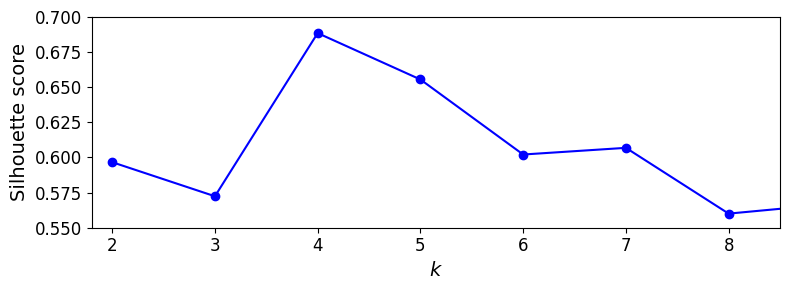

In [15]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
from sklearn.metrics import silhouette_score
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([1.8, 8.5, 0.55, 0.7])
save_fig("silhouette_score_vs_k_plot")
plt.show()

1에 가장 가까운 k값을 고르면 4가 된다. 이러한 결과는 위 inertial에서는 드러나지 않았다.

**실루엣 다이어그램 silhouette diagram**
(실루엣 계수를 이용한 그래프)
- height length : 클러스터가 포함한 샘플 개수
- width length : 클러스터에 포함된 샘플의 정렬된 실루엣 계수(넓을수록 좋다)

Saving figure silhouette_analysis_plot


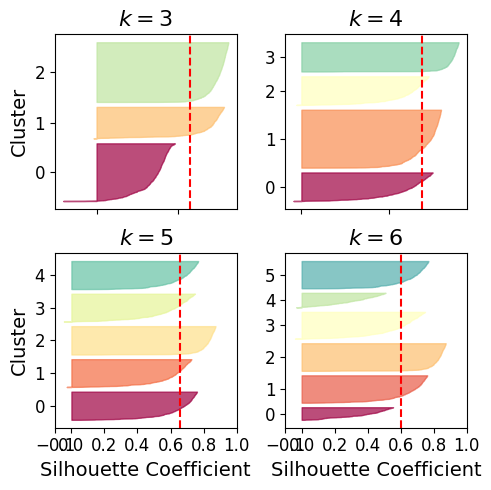

In [18]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(5, 5))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

save_fig("silhouette_analysis_plot")
plt.show()

## 1.2 k-means 한계
K-means로 좋은 결과를 내기위해서는
1. 알고리즘을 여러 번 실행해야한다.
2. 클러스터 개수를 지정해야한다.
하지만, 각 클러스터 크기나 밀집도가 다르거나, 원형이 아니면 잘 작동하지 않는다.\
데이터에 따라 적합한 군집 알고리즘이 다르다. 

## 1.3 군집으로 이미지 분할하기
이미지 분할 image segmentation = 이미지를 세그먼트 여러 개로 분할

시맨틱 분할 semantic segmentation : 동일 object에 속한 모든 픽셀은 같은 세그먼트로 할당

semantic or instance segmentation 으로 합성곱 신경망을 사용한 복잡한 모델로 최고 수준 성능을 낼 수 있다.

#### color segmentation
동일 색상 픽셀 -> 같은 세그멘트에 할당 \
예) 한 지역의 전체 산림 면적 측정

In [20]:
import urllib.request
from sklearn.datasets import fetch_openml
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))
from matplotlib.image import imread
image = imread(os.path.join(images_path, filename))
image.shape

(533, 800, 3)

In [21]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [22]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))

Saving figure image_segmentation_diagram


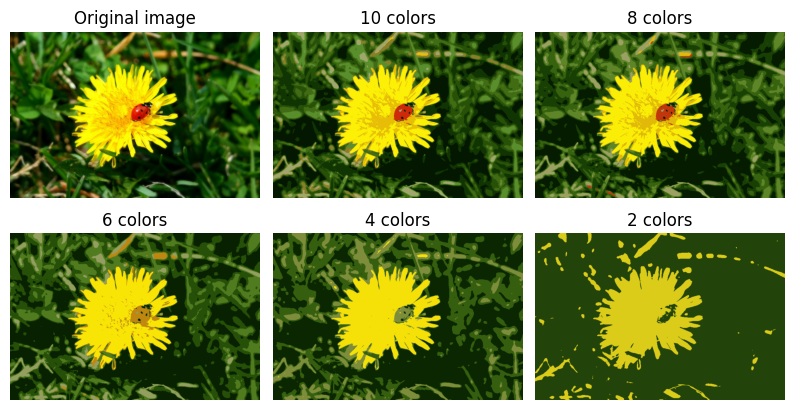

In [24]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

save_fig('image_segmentation_diagram', tight_layout=False)
plt.show()

무당벌레 색의 비중이 전체 중 적은 비율이기 때문에 색을 줄일수록 무당벌레의 색은 걸러진다.

## 1.4 군집으로 전처리하기
지도 학습 알고리즘 전 전처리 단계로 사용 \
예) 군집으로 차원 축소하기


In [25]:
# 전처리없이 logistic regression으로만 훈련해보기
# dataset 준비
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state=42)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg_score = log_reg.score(X_test, y_test)
log_reg_score

0.9688888888888889

In [26]:
# 클러스터링 알고리즘 + logisticregression 
from sklearn.pipeline import Pipeline
k=50
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=k, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)
pipeline_score = pipeline.score(X_test, y_test)
pipeline_score

0.9777777777777777

약 28% 오차율을 줄였다. 이는 원본 데이터셋보다 클러스터링 진행된 데이터가 선형적으로 더 잘 구분할 수 있다는 걸 뜻한다.

k값을 임의로 50으로 지정했다 == 더 좋은 결과를 낼 수 있다. \
다양한 방법, 교차 검증에서 가장 좋은 성능을 추출해보자. GridSearchCV를 이용한다.

In [27]:
1 - (1 - pipeline_score) / (1 - log_reg_score)

0.28571428571428414

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters=range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.8s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.6s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.2s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.3s
[CV] END ...............................kmeans_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

In [29]:
grid_clf.best_params_
grid_clf.score(X_test, y_test)

0.9822222222222222

## 1.5 군집으로 준지도 학습하기
레이블이 없는 데이터가 많고 레이블이 있는 데이터가 적을 때 사용한다.

LogisticRegression 경우

In [30]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8333333333333334

kmeans를 이용해 이미지를 클러스터링하고, 클러스터의 센트로이드 이미지를 찾는다. 이것은 대표 이미지가 된다.

Saving figure representative_images_diagram


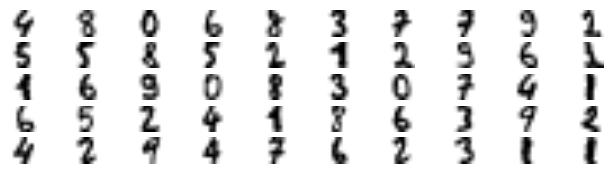

In [31]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

save_fig("representative_images_diagram", tight_layout=False)
plt.show()



In [32]:
y_representative_digits = y_train[representative_digit_idx]
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9222222222222223

대표 이미지를 이용해 훈련시켰더니 더 좋은 성능이 나왔다.

해당 작업에 레이블 전파 label propagation을 추가해보자.

In [33]:
y_train_propagated = np.empty(len(X_train), dtype=np.int32)
for i in range(k):
    y_train_propagated[kmeans.labels_==i] = y_representative_digits[i]
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9333333333333333

성능이 0.01% 올랐다. 

아래는 센트로이드와 가까운 샘플의 20%에만 레이블을 전파하는 것이다. 결과는 0.94로 더 올랐다.

In [35]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1
partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.94

In [36]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

0.9896907216494846

## 1.6 DBSCAN

predict() 가 없고 fit_predict() 가 있다. = 새로운 data에 대한 예측 불가 \
예측의 경우 분류 알고리즘을 사용한다.

- 이상치에 안정적
- 하이퍼파라미터 2개 (eps : 최소 거리제한 , min_samples : 몇 개의 데이터가 모여야 하나의 군집으로 볼 것인가?)
- 각 클러스터당 밀집도가 다르면 (데이터가 고루 분포되어 있지 않으면) 모두 다 클러스터를 잘 하는게 불가.
- 계산 복잡도 = O(m log m)
- 계산 복잡도는 sample data 수에 따른 선형적 증가

- scikit-learn으로 구현 시 eps 커지면 O(m^2) 메모리 필요

In [1]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [2]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5])

분류 알고리즘을 이용해 예측하고자하면 KNeighborsClassifier를 사용할 수 있겠다.

In [4]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([6, 0, 3, 2])

In [5]:
knn.predict_proba(X_new) # 각 클래스에 대한 확률

array([[0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.76],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.3 , 0.7 , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ]])

In [7]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors=1)
"""
y_dist: 가장 가까운 k개 이웃의 거리
y_pred_idx : 가장 가까운 이웃의 인덱스값

데이터 : core 데이터 + 아웃라이어 + 결정경계
"""
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
""" 
.core_sample_indices_ : core data 인덱스값 
components_ : 핵심 data
"""
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

(array([[0.01164677, 0.01662618, 0.02544473, ..., 0.29455069, 0.30417779,
         0.3112998 ],
        [0.00791227, 0.02660297, 0.0300627 , ..., 0.20175089, 0.20559946,
         0.20737691],
        [0.0410165 , 0.04418399, 0.04988495, ..., 0.19083566, 0.19267841,
         0.19275122],
        ...,
        [0.01433846, 0.02366424, 0.04437151, ..., 0.21613281, 0.22178339,
         0.22369124],
        [0.02244587, 0.02822277, 0.03399084, ..., 0.21332289, 0.21859198,
         0.2230076 ],
        [0.01052103, 0.02314647, 0.02844483, ..., 0.17802363, 0.18626515,
         0.18681249]]),
 array([[336, 510, 223, ..., 768, 433, 250],
        [622, 374, 699, ..., 198, 149, 403],
        [172, 130, 465, ..., 724, 264,  96],
        ...,
        [487, 513, 577, ..., 560,  37,  95],
        [342, 727, 517, ..., 764, 587, 622],
        [315, 401,  21, ..., 226, 199, 168]]))

## 1.7 다른 군집 알고리즘
### 병합 군집
- Bottom to Up
- 초기 : 샘플 하나를 클러스터 하나로 봄
- 인접한 클러스터끼리 쌍으로 연결
- 루트가 만들어지는 방향으로 병합

## BIRCH
## 평균-이동
## 유사도 전파
## 스펙트럼 군집

# 2. 가우시안 혼합
- 확률 모델
- 여러 개의 가우시안 분포의 파라미터값은 알려지지 않은 것
- 여러 개의 가우시안 분포가 혼합된 것에서 생성됐다고 가정
- 1개의 가우시안 분포에서 생성된 모든 샘플은 1개의 클러스터 형성 (타원형의 클러스터)
- 각 클러스터의 모양, 크기, 밀집도, 방향은 다르다
- 생성 모델이므로 새로운 샘플을 만들 수 있다

## 2.1 가우시안 혼합을 사용한 이상치 탐지
이상치 탐지란?
- 부정 거래 감지, 제조 결함 감지, 모델 훈련 전 데이터셋에서 이상치 제거
- 밀도가 낮은 지역의 샘플 = 이상치 (밀도 임곗값 기준)
- False Positive 가 많다면 임곗값을 더 낮춘다. / False Nagative 라면 임곗값을 더 높인다.

## 2.2 클러스터 개수 선택하기
- 가우시안 혼합에서 사용하는 지표 : BIC, AIC 이론적 정보 기준을 최소화하는 모델 찾기
- BIC, AIC 결과가 다른 경우 BIC가 더 파라미터가 간단한 경향이 있다. 하지만 대규모 데이터셋에서는 잘 안맞는 확률을 가진다.

(- k-means에서는 이너셔, 실루엣 점수 사용한 클러스터 갯수 선택.(클러스터가 타원형, 크기가 다를 때 안정적이지 않아서 가우시안 혼합에서 사용 못함))


**<가능도 함수>**

확률 : 파라미터 $\theta$  인 확률 모델이 주어지면 미래 예측 x값이 얼마나 괜찮은 아이인지 설명한다, $\theta$  값 고정, x의 함수

가능도 : 미래 예측 x값이 주어지면 특정 파라미터 값 $\theta$  가 얼마나 괜찮은 아이인지 설명한다, x값 고정, $\theta$ 의 함수

- 파라미터 값 $\theta$ 를 아느냐, 예측 x 값을 아느냐에 따라 바뀐다고도 볼 수 있겠다.

- x가 주어졌을 때 가장 그럴 듯한 $\theta$ 를 구해야 한다. -> 가능도 함수를 최대화하는 값을 찾아야 한다. 
- x값 하나 관측 시 $\theta$ 의 최대 가능도 추정 MLE 를 구한다. 
- $\theta$에 대한 사전 확률 분포가 존재한다면 최대 사후 확률을 구한다.


In [8]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)
X_new, y_new = gm.sample(6)

NameError: name 'make_blobs' is not defined

In [ ]:
gm.bic(X)

## 2.3 베이즈 가우시안 혼합 모델
최적의 클러스터 개수를 찾기보다, 불필요한 클러스터의 가중치를 0으로 만드는 BayesianGaussianMixture 방법이 있다.
